# TFM. Analisis Datos
## MVP

## Importacion de librerias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

### Analisis Datos

In [2]:
df_Envios = pd.read_pickle('./data/df_Envios')
df_Call = pd.read_pickle('./data/df_Call')

In [3]:
#df_Envios['Envios'] = df_Envios.loc[:,['Urgente hoy','Urgente 14']].sum(axis=1)
#df_Envios['Envios'] = df_Envios.iloc[:,[0,1,2,3,4,5,6]].sum(axis=1)
#df_Envios['Envios'] = df_Envios.iloc[:,[2,3,5]].sum(axis=1)
#df_Envios['Envios'] = df_Envios.iloc[:,0:7].sum(axis=1)

In [4]:
df_Envios.head()

,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,Económico,Express documentos,Express paquetes,Marítimo baleares,Mascotas,Mrw economy (ecopaq),OperativaServicioEnumECOBA,OperativaServicioEnumU19E;U19;E,Plan ayuda,Retorno albarán,Retorno burofax,Retorno canje,Urgente 10,Urgente 10 expedición,Urgente 12,Urgente 12 expedición,Urgente 14,Urgente 14 expedición,Urgente 19,Urgente 19 expedición,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday
Fecha envío,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,33,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,2.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
2019-01-02,1923,0.0,5.0,14.0,0.0,5.0,0.0,424.0,0.0,0.0,311.0,0.0,0.0,723.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,127.0,0.0,187.0,10.0,13.0,0.0,50.0,38.0,5.0,0.0,0.0,0.0,7.0,0,0,0,0,1
2019-01-03,1408,0.0,0.0,12.0,0.0,3.0,0.0,348.0,0.0,0.0,208.0,0.0,0.0,540.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,80.0,4.0,131.0,4.0,5.0,0.0,1.0,42.0,3.0,1.0,0.0,0.0,23.0,0,0,1,0,0
2019-01-04,3220,0.0,1.0,10.0,0.0,3.0,0.0,888.0,1.0,0.0,442.0,0.0,0.0,1183.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,176.0,7.0,286.0,14.0,3.0,0.0,104.0,69.0,5.0,1.0,0.0,0.0,0.0,1,0,0,0,0
2019-01-05,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [5]:
df_explore = pd.concat([df_Envios, df_Call], axis=1).reset_index()
df_explore.dropna(inplace=True)
df_explore.head()

,index,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,Económico,Express documentos,Express paquetes,Marítimo baleares,Mascotas,Mrw economy (ecopaq),OperativaServicioEnumECOBA,OperativaServicioEnumU19E;U19;E,Plan ayuda,Retorno albarán,Retorno burofax,Retorno canje,Urgente 10,Urgente 10 expedición,Urgente 12,Urgente 12 expedición,Urgente 14,Urgente 14 expedición,Urgente 19,Urgente 19 expedición,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday,dateCreacion
1,2019-01-02,1923.0,0.0,5.0,14.0,0.0,5.0,0.0,424.0,0.0,0.0,311.0,0.0,0.0,723.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,127.0,0.0,187.0,10.0,13.0,0.0,50.0,38.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,281.0
2,2019-01-03,1408.0,0.0,0.0,12.0,0.0,3.0,0.0,348.0,0.0,0.0,208.0,0.0,0.0,540.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,80.0,4.0,131.0,4.0,5.0,0.0,1.0,42.0,3.0,1.0,0.0,0.0,23.0,0.0,0.0,1.0,0.0,0.0,283.0
3,2019-01-04,3220.0,0.0,1.0,10.0,0.0,3.0,0.0,888.0,1.0,0.0,442.0,0.0,0.0,1183.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,176.0,7.0,286.0,14.0,3.0,0.0,104.0,69.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,351.0
6,2019-01-07,4595.0,0.0,0.0,7.0,0.0,2.0,0.0,1279.0,0.0,0.0,400.0,0.0,0.0,2295.0,17.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,155.0,11.0,233.0,21.0,6.0,0.0,98.0,62.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,173.0
7,2019-01-08,2924.0,1.0,2.0,5.0,1.0,3.0,0.0,768.0,0.0,0.0,334.0,0.0,0.0,1169.0,20.0,1.0,0.0,0.0,0.0,30.0,0.0,0.0,184.0,6.0,184.0,15.0,8.0,0.0,107.0,79.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,174.0


In [6]:
x = np.array(df_explore['index'])
#envios = np.array(df_explore['total'])
llamadas = np.array(df_explore['dateCreacion'])

envios = np.array(df_explore['total'])

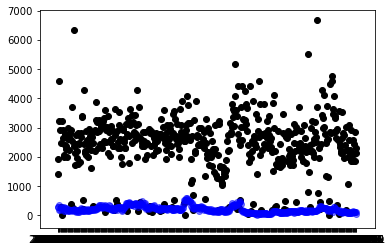

In [7]:
#Xs, ys1, ys2 = normalizar(x, envios, llamadas)
plt.scatter(x, envios, c='black')
plt.scatter(x, llamadas, c='blue', alpha=.5);

In [8]:
df_explore[['dateCreacion','total']].corr()

,dateCreacion,total
dateCreacion,1.000000,0.048328
total,0.048328,1.000000


In [9]:
df_explore.corr('pearson')

,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,Económico,Express documentos,Express paquetes,Marítimo baleares,Mascotas,Mrw economy (ecopaq),OperativaServicioEnumECOBA,OperativaServicioEnumU19E;U19;E,Plan ayuda,Retorno albarán,Retorno burofax,Retorno canje,Urgente 10,Urgente 10 expedición,Urgente 12,Urgente 12 expedición,Urgente 14,Urgente 14 expedición,Urgente 19,Urgente 19 expedición,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday,dateCreacion
total,1.000000,0.170729,0.091662,0.279780,0.005691,0.257712,0.019879,0.926334,0.022661,0.034561,0.756139,0.046049,0.005823,0.928433,0.602964,0.096342,-0.028177,-0.013743,-0.029435,0.232570,0.015708,-0.011909,0.727630,0.372778,0.736656,0.411509,0.249816,0.015821,0.558723,0.573175,0.294807,0.374497,0.057855,0.129874,0.024347,-0.152010,0.181371,-0.004545,-0.021687,-0.004725,0.048328
Bag 14,0.170729,1.000000,-0.048461,0.022830,-0.020289,0.193082,-0.029880,0.101493,-0.020119,-0.021090,0.116951,-0.026762,0.035915,0.172963,0.074232,0.014551,-0.021090,-0.014899,-0.014899,0.293090,-0.014899,-0.029880,0.183349,0.351400,0.148466,0.254212,0.061360,0.016148,0.093816,0.049549,0.164373,0.142445,-0.033437,0.123679,-0.062184,-0.003194,-0.071390,0.065459,0.050169,-0.041844,0.092934
Bag 19,0.091662,-0.048461,1.000000,0.203865,-0.014164,0.261594,0.025039,0.033421,0.029573,-0.023864,0.284588,-0.009414,-0.000304,-0.022702,0.099616,0.005857,-0.000129,0.050214,-0.016859,-0.014931,-0.016859,-0.025403,0.239317,0.154765,0.341989,-0.115144,0.085402,-0.019098,0.177107,0.194695,0.304668,0.067117,-0.022782,0.236791,0.142682,-0.062779,0.002524,-0.013516,0.002417,0.069338,0.063669
Burofax,0.279780,0.022830,0.203865,1.000000,-0.019945,0.200115,0.057736,0.189860,-0.008234,-0.020912,0.410031,0.019752,0.011606,0.169418,0.207588,0.020030,0.008985,0.006348,-0.014774,0.102877,-0.014774,-0.013744,0.400256,0.242961,0.429139,0.127159,0.200523,-0.011368,0.196833,0.260371,0.216328,0.212966,0.068757,0.123847,0.098088,-0.079935,0.069370,0.007526,-0.020863,0.022758,0.164614
Devolución burofax,0.005691,-0.020289,-0.014164,-0.019945,1.000000,0.038828,-0.007058,0.003686,-0.010018,-0.004982,0.013186,-0.013327,-0.011780,-0.011058,0.020968,0.027147,-0.004982,-0.003520,-0.003520,0.044711,-0.003520,-0.007058,0.074589,0.002755,0.026854,0.060976,0.019263,-0.009497,0.006415,0.043106,-0.002421,0.002710,0.117126,-0.026065,-0.014689,-0.040024,-0.040963,0.017649,0.103404,-0.042129,-0.055895
Documentos 14,0.257712,0.193082,0.261594,0.200115,0.038828,1.000000,-0.008351,0.168693,0.048205,-0.025804,0.393590,0.045102,-0.022497,0.134505,0.173861,0.032351,-0.025804,0.023968,-0.032296,0.311930,-0.004164,-0.008351,0.446482,0.319827,0.457312,0.089566,0.345170,0.052024,0.225560,0.305079,0.310415,0.264442,0.066416,0.126327,0.041652,-0.077820,-0.015420,0.124017,-0.050117,0.018096,0.173628
E-Commerce,0.019879,-0.029880,0.025039,0.057736,-0.007058,-0.008351,1.000000,0.020576,-0.010323,-0.005133,0.078593,-0.013731,-0.012138,-0.004444,0.113856,0.048845,-0.005133,-0.003626,-0.003626,0.000727,-0.003626,-0.007273,0.029818,-0.023720,0.046974,-0.032051,-0.005216,-0.009786,0.006085,-0.029493,0.057870,-0.000072,-0.008139,0.038400,0.019609,-0.041240,0.011423,0.010576,0.008919,0.009329,-0.020650
E-commerce,0.926334,0.101493,0.033421,0.189860,0.003686,0.168693,0.020576,1.000000,0.041841,0.047443,0.624259,0.005251,-0.018311,0.826781,0.573695,0.095493,-0.027564,-0.031311,-0.039527,0.170642,0.004898,-0.030115,0.592276,0.286795,0.599545,0.327815,0.185878,-0.007765,0.477799,0.467390,0.173637,0.337009,0.083939,0.051852,0.003120,-0.172218,0.269574,-0.023009,-0.031443,-0.043802,-0.006497
E-commerce canje,0.022661,-0.020119,0.029573,-0.008234,-0.010018,0.048205,-0.010323,0.041841,1.000000,-0.007286,0.047465,-0.019490,0.091232,-0.011644,0.036498,0.007113,-0.007286,-0.005147,-0.005147,-0.014637,-0.005147,-0.010323,0.045040,0.085403,0.048048,0.085051,-0.011066,-

Quitamos la variables que estan fuertemente correlacionadas con el total de envios

In [10]:
columns = ['Urgente 8:30 expedición','Urgente 8:30', \
           'Urgente 19 expedición','Urgente 19', \
           'Urgente 12 expedición','Urgente 12', \
           'Urgente 10 expedición','Urgente 10', \
           'Mascotas','Marítimo baleares', 'Económico', \
           'E-commerce']

In [11]:
df_explore.drop(labels=columns, inplace=True, axis=1)

In [12]:
df_explore.head()

,index,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce canje,Ecobox 25,Express documentos,Express paquetes,Mrw economy (ecopaq),OperativaServicioEnumECOBA,OperativaServicioEnumU19E;U19;E,Plan ayuda,Retorno albarán,Retorno burofax,Retorno canje,Urgente 14,Urgente 14 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday,dateCreacion
1,2019-01-02,1923.0,0.0,5.0,14.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,13.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,281.0
2,2019-01-03,1408.0,0.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,23.0,0.0,0.0,1.0,0.0,0.0,283.0
3,2019-01-04,3220.0,0.0,1.0,10.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,351.0
6,2019-01-07,4595.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,173.0
7,2019-01-08,2924.0,1.0,2.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,174.0


In [13]:
df_explore.iloc[:,1:-6] = np.log(df_explore.iloc[:,1:-6]).replace(-np.inf, 0)
df_explore.head(25)

,index,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce canje,Ecobox 25,Express documentos,Express paquetes,Mrw economy (ecopaq),OperativaServicioEnumECOBA,OperativaServicioEnumU19E;U19;E,Plan ayuda,Retorno albarán,Retorno burofax,Retorno canje,Urgente 14,Urgente 14 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday,dateCreacion
1,2019-01-02,7.561642,0.000000,1.609438,2.639057,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,2.564949,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,1.0,281.0
2,2019-01-03,7.249926,0.000000,0.000000,2.484907,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,1.609438,0.0,0.0,0.0,3.135494,0.0,0.0,1.0,0.0,0.0,283.0
3,2019-01-04,8.077137,0.000000,0.000000,2.302585,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.098612,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,351.0
6,2019-01-07,8.432724,0.000000,0.000000,1.945910,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,1.791759,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,173.0
7,2019-01-08,7.980708,0.000000,0.693147,1.609438,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.401197,0.0,0.0,2.079442,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,174.0
8,2019-01-09,5.666427,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,227.0
9,2019-01-10,7.808323,1.791759,0.000000,2.397895,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.091042,0.0,0.0,1.945910,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,236.0
10,2019-01-11,3.135494,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,270.0
13,2019-01-14,8.082402,0.000000,0.000000,3.135494,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,0.000000,0.0,0.0,0.0,2.639057,0.0,1.0,0.0,0.0,0.0,260.0
14,2019-01-15,7.976252,0.000000,0.693147,3.091042,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,3.526361,0.0,0.0,0.0,1.0,0.0,259.0


In [14]:
#df_explore.sum()

In [15]:
df_explore.dateCreacion.describe()[0] ##Registros

554.0

In [16]:
#df_subset = df_explore.iloc[:,[0,1]]
#df_subtotal = df_explore.iloc[:,-1]
#df_subtotal = pd.concat([df_subset, df_subtotal], axis=1)
#df_subtotal.head()

In [17]:
#sns.pairplot(df_explore.loc[:,['dateCreacion','E-commerce', 'Urgente 10', 'Urgente 12', 'Marítimo baleares', 'Económico']]);

In [18]:
#No se usa
def normalizar2(Xs, datos, llamadas):
    mask = datos == 0
    x = np.delete(Xs, mask)
    d1 = np.delete(datos, mask)
    d2 = np.delete(llamadas, mask)
    d1 = np.log(d1)
    d2 = np.log(d2)
    
    return x, d1, d2

def normalizar(Xs, datos, llamadas):
    mask = datos == 0
    x = np.delete(Xs, mask)
    d1 = np.delete(datos, mask)
    d2 = np.delete(llamadas, mask)
    
    return x, d1, d2

In [19]:
df_explore.to_pickle('./data/df_data')